In [22]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [32]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox




In [24]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

In [25]:
X = mnist.data / 255.

from sklearn.decomposition import NMF, PCA
pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
def plot_decomposition(image, components, coef, cmap='viridis'):
    image_shape = image.shape
    plt.figure(figsize=(20, 3))
    ax = plt.gca()


    imagebox = OffsetImage(image, zoom=5, cmap="gray")
    ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
    ax.add_artist(ab)
    sorting = np.argsort(np.abs(coef))[::-1]

    for i in range(4):
        imagebox = OffsetImage(components[sorting[i]].reshape(image_shape), zoom=5., cmap=cmap)


        ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                          pad=0.0,
                          xycoords='data'
                          )
        ax.add_artist(ab)
        if i == 0:
            plt.text(.18, .3, r'{:.2f}'.format(coef[sorting[i]]), fontdict={'fontsize': 30})
        else:
            plt.text(.165 + .202 * i, .3, r'+ {:.2f}'.format(coef[sorting[i]]), fontdict={'fontsize': 30})

    plt.text(.96, .25, '+ ...', fontdict={'fontsize': 30})

    plt.rc('text', usetex=True)
    plt.text(.13, .3, r'\approx', fontdict={'fontsize': 30})
    plt.axis("off")


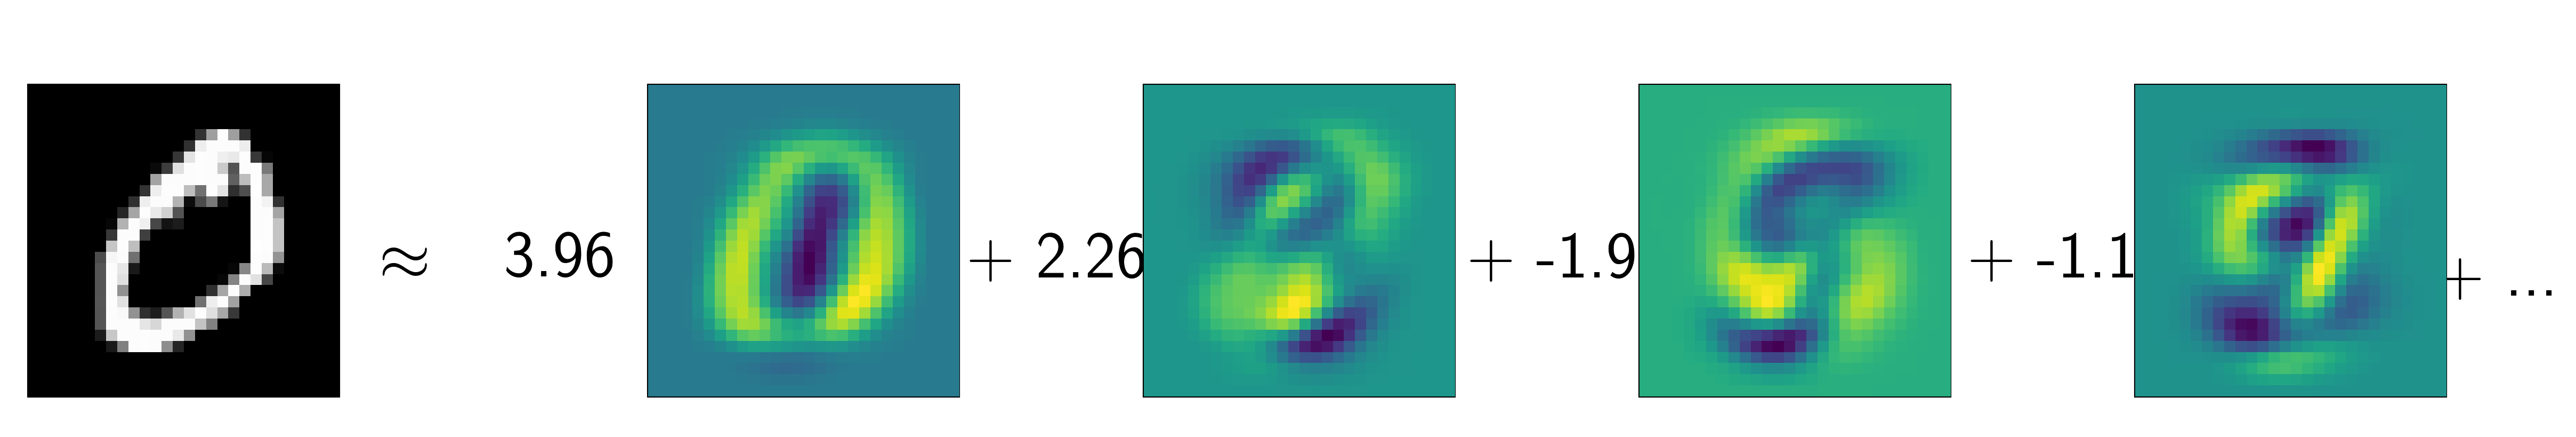

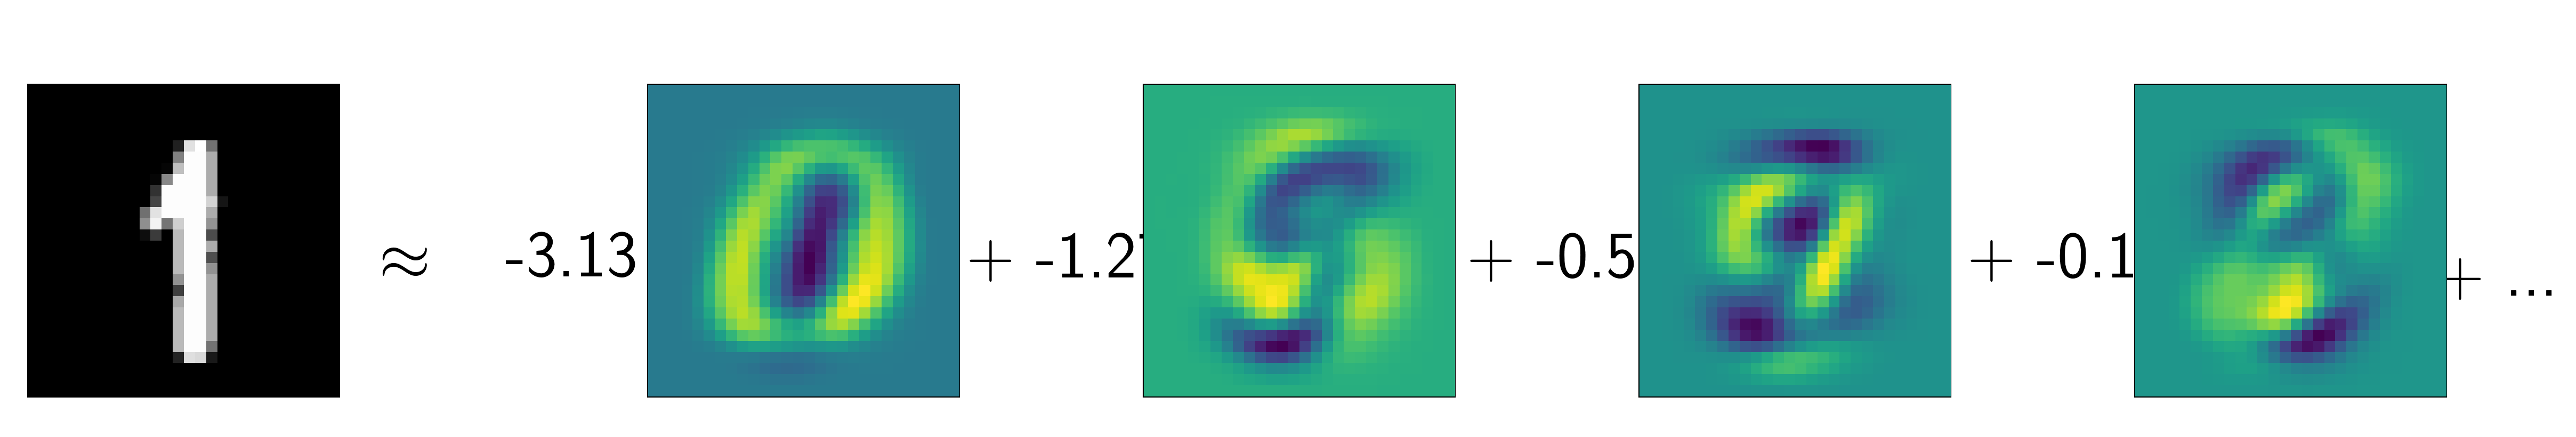

In [75]:
plot_decomposition(mnist.data[0].reshape(28, 28), pca.components_, pca.transform(mnist.data[:1] / 255.)[0])
plot_decomposition(mnist.data[11000].reshape(28, 28), pca.components_, pca.transform(mnist.data[11000:11001] / 255.)[0])

In [57]:
nmf = NMF(n_components=20)
nmf.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

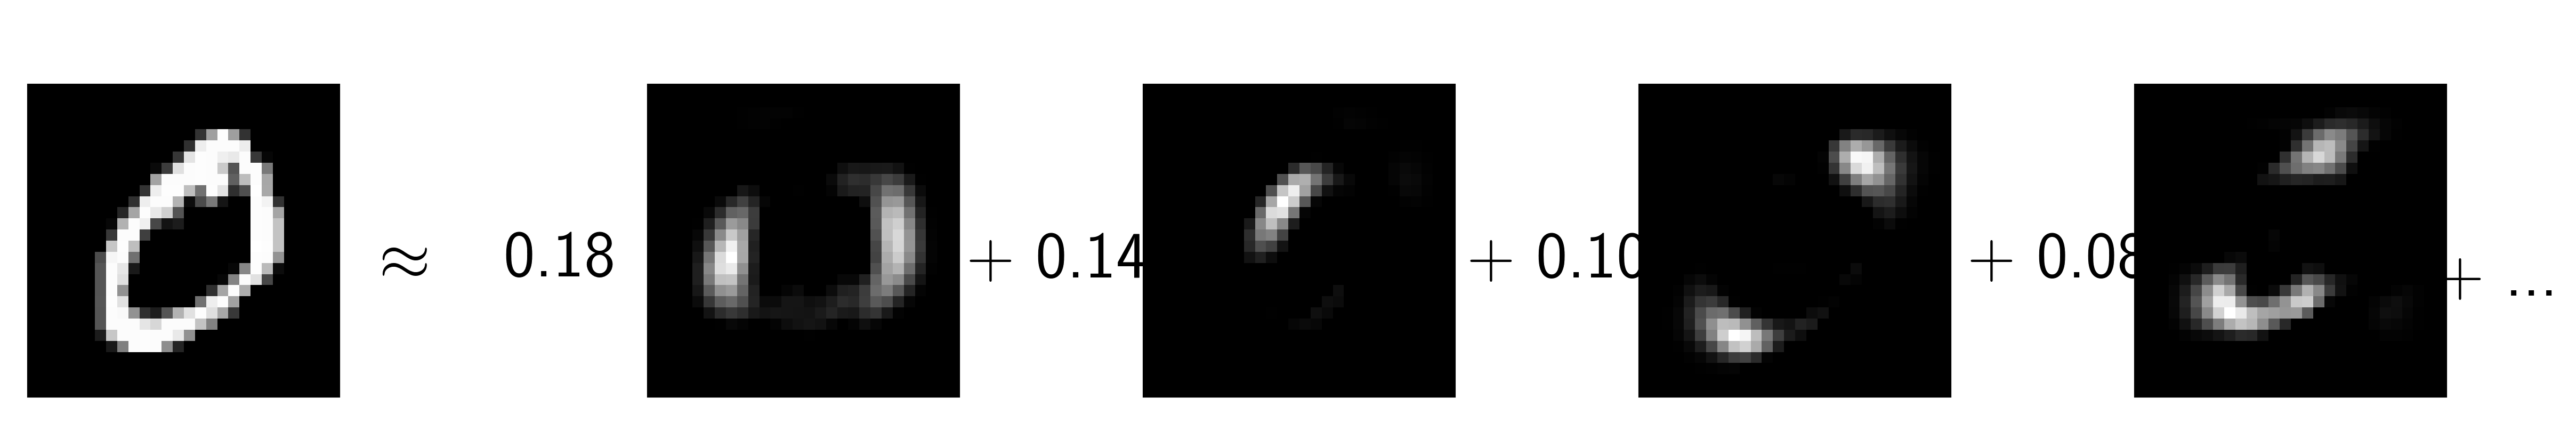

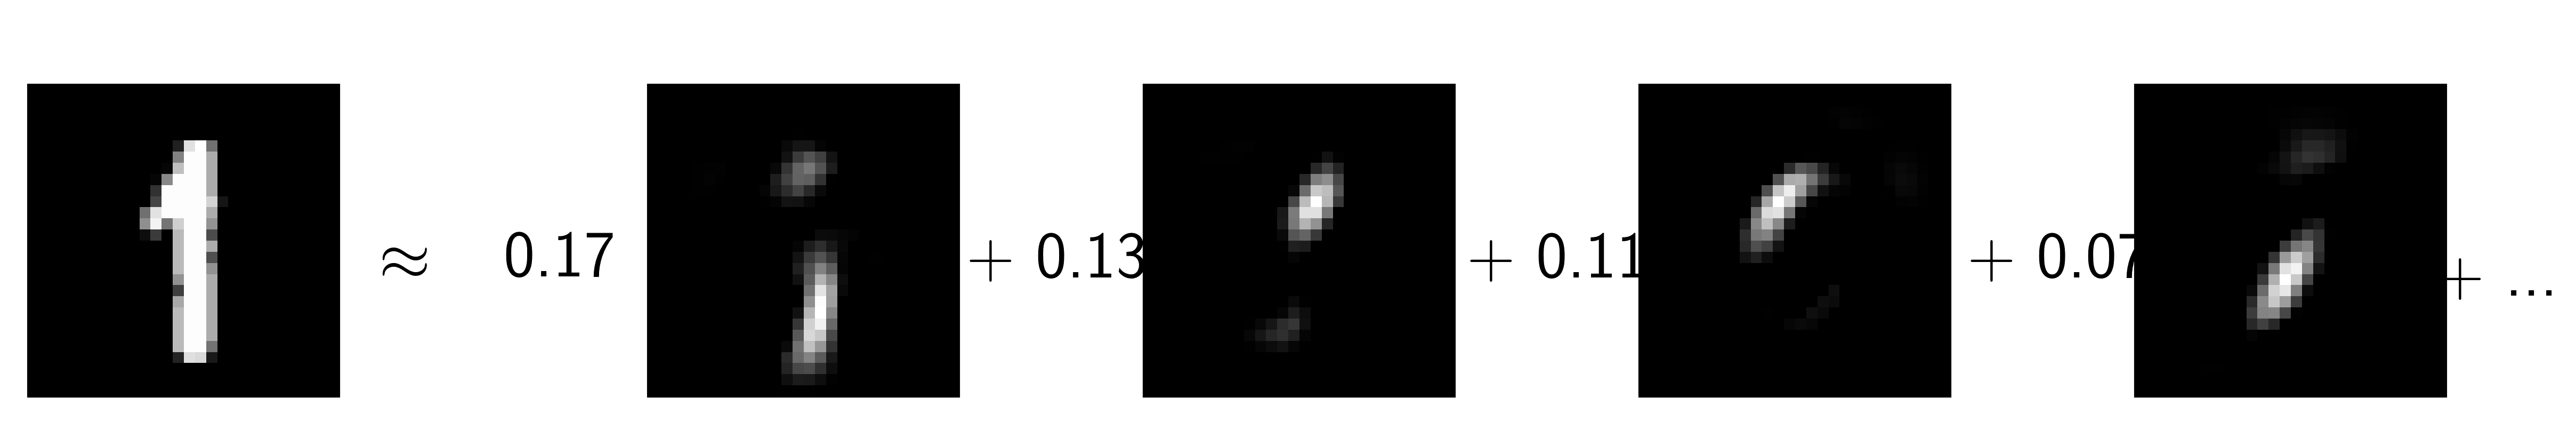

In [76]:
plot_decomposition(mnist.data[0].reshape(28, 28), nmf.components_, nmf.transform(mnist.data[:1] / 255.)[0], cmap="gray")
plot_decomposition(mnist.data[11000].reshape(28, 28), nmf.components_, nmf.transform(mnist.data[11000:11001] / 255.)[0], cmap="gray")

In [77]:
nmf20 = NMF(n_components=20)
nmf20.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=20, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [82]:
nmf5 = NMF(n_components=5)
nmf5.fit(X)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=5, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

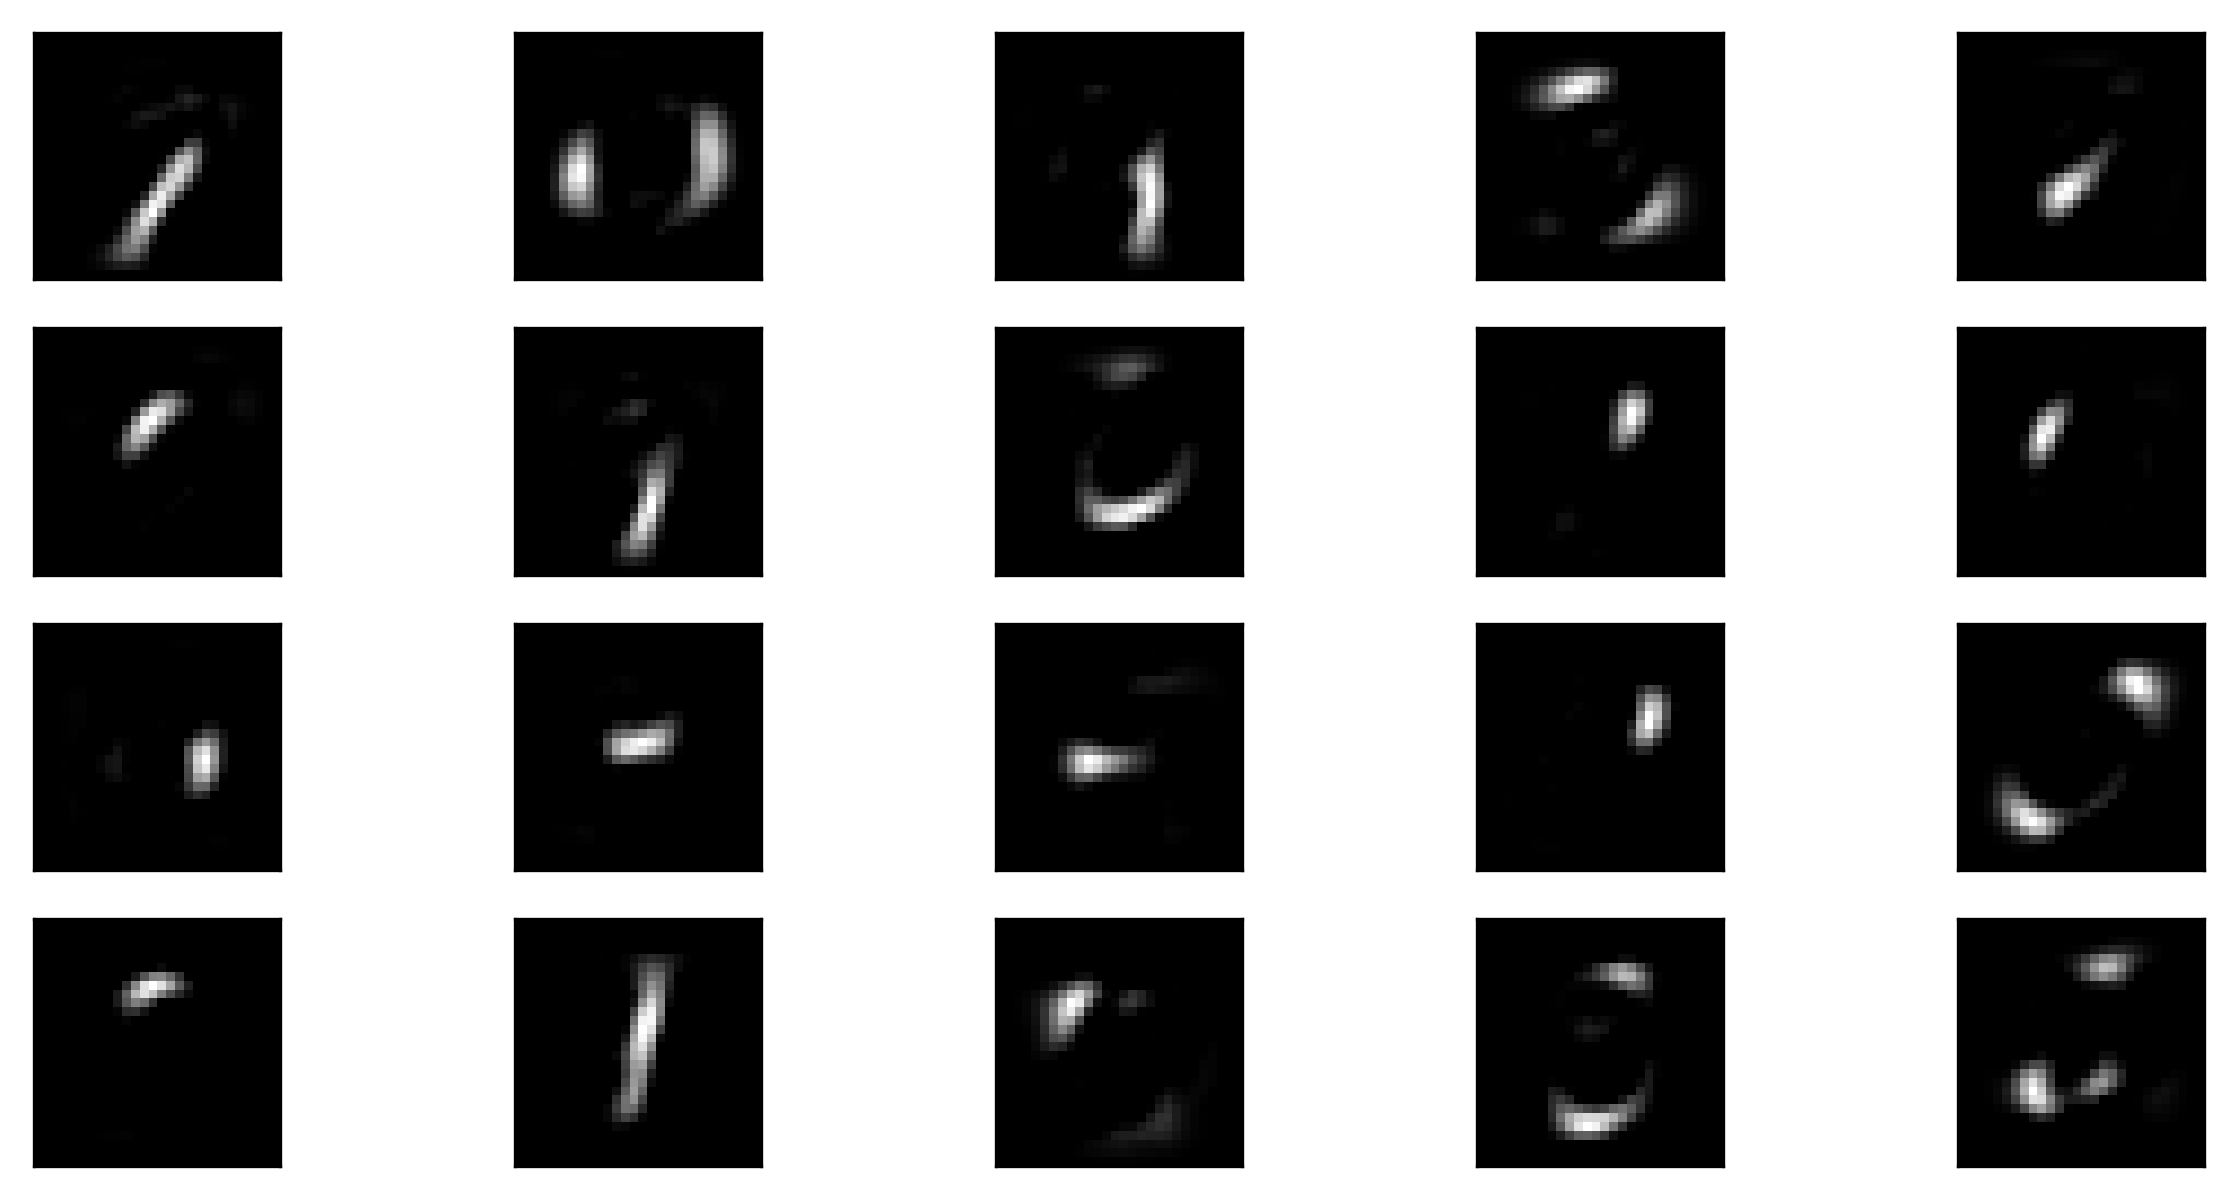

In [80]:
fig, axes = plt.subplots(4, 5, figsize=(10, 5))
for ax, comp in zip(axes.ravel(), nmf20.components_):
    ax.imshow(comp.reshape(28, 28), cmap="gray")
    ax.set_xticks(())
    ax.set_yticks(())

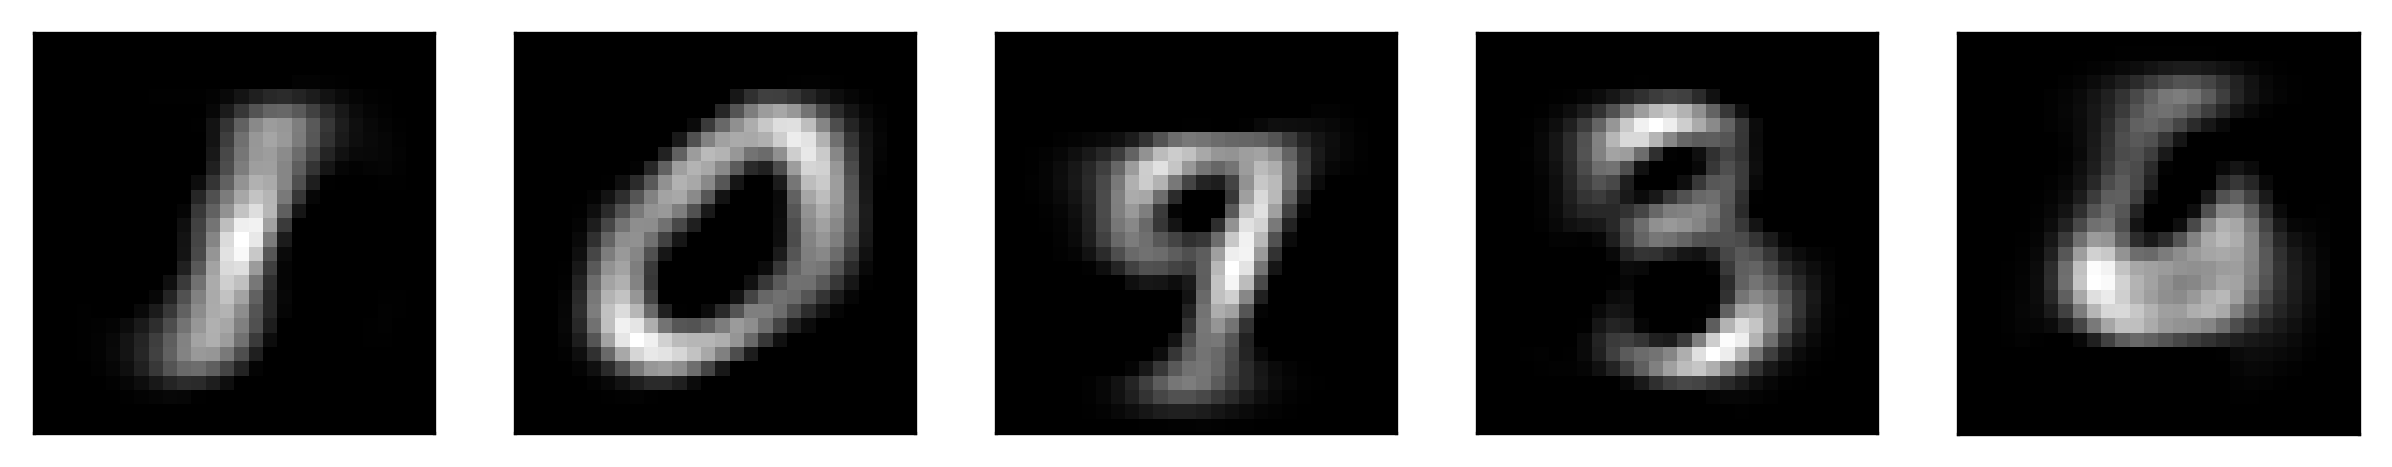

In [83]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for ax, comp in zip(axes.ravel(), nmf5.components_):
    ax.imshow(comp.reshape(28, 28), cmap="gray")
    ax.set_xticks(())
    ax.set_yticks(())

# Outlier Detection

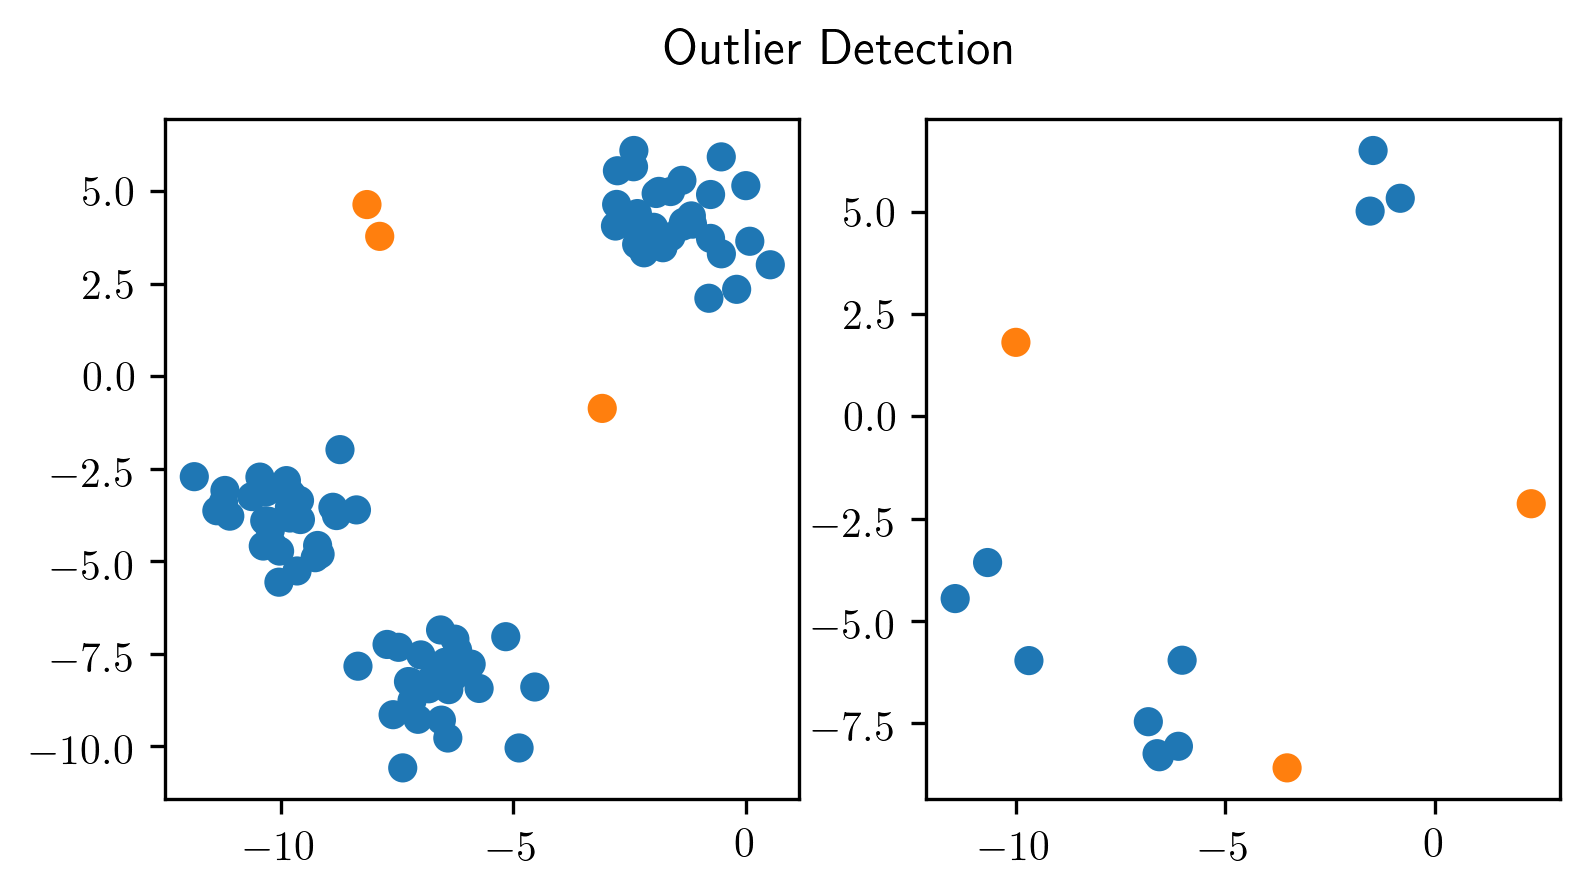

In [121]:
from sklearn.datasets import make_blobs
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
X, y = make_blobs(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, random_state=0)
rng = np.random.RandomState(5)
X_train_noise = np.vstack([X_train, rng.uniform(X_train.min(), X_train.max(), size=(3, 2))])
y_train_noise = np.hstack([np.zeros_like(y_train), [1, 1, 1]])
ax[0].scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(y_train_noise))
X_test_noise = np.vstack([X_test, rng.uniform(X_test.min(), X_test.max(), size=(4, 2))])
y_test_noise = np.hstack([np.zeros_like(y_test), [1, 0, 1, 1, 1]])
ax[1].scatter(X_test_noise[:, 0], X_test_noise[:, 1], c=plt.cm.Vega10(y_test_noise))
plt.suptitle("Outlier Detection")

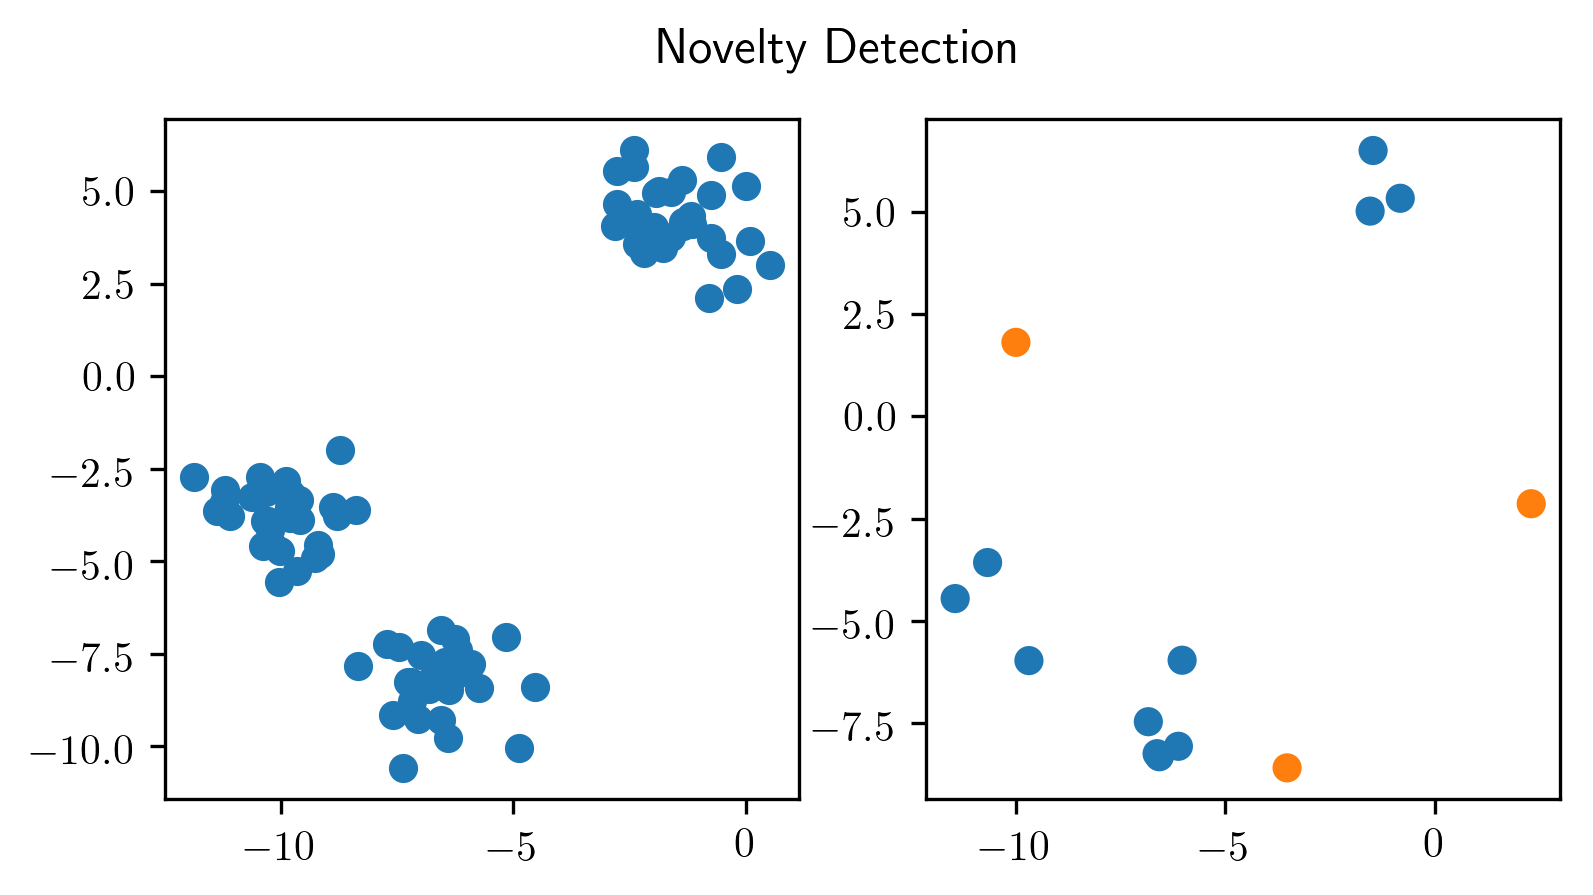

In [123]:
from sklearn.datasets import make_blobs
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
X, y = make_blobs(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, random_state=0)
rng = np.random.RandomState(5)
X_train_noise = np.vstack([X_train, rng.uniform(X_train.min(), X_train.max(), size=(3, 2))])
y_train_noise = np.hstack([np.zeros_like(y_train), [1, 1, 1]])
ax[0].scatter(X_train[:, 0], X_train[:, 1])
X_test_noise = np.vstack([X_test, rng.uniform(X_test.min(), X_test.max(), size=(4, 2))])
y_test_noise = np.hstack([np.zeros_like(y_test), [1, 0, 1, 1, 1]])
ax[1].scatter(X_test_noise[:, 0], X_test_noise[:, 1], c=plt.cm.Vega10(y_test_noise))
plt.suptitle("Novelty Detection")

([], <a list of 0 Text yticklabel objects>)

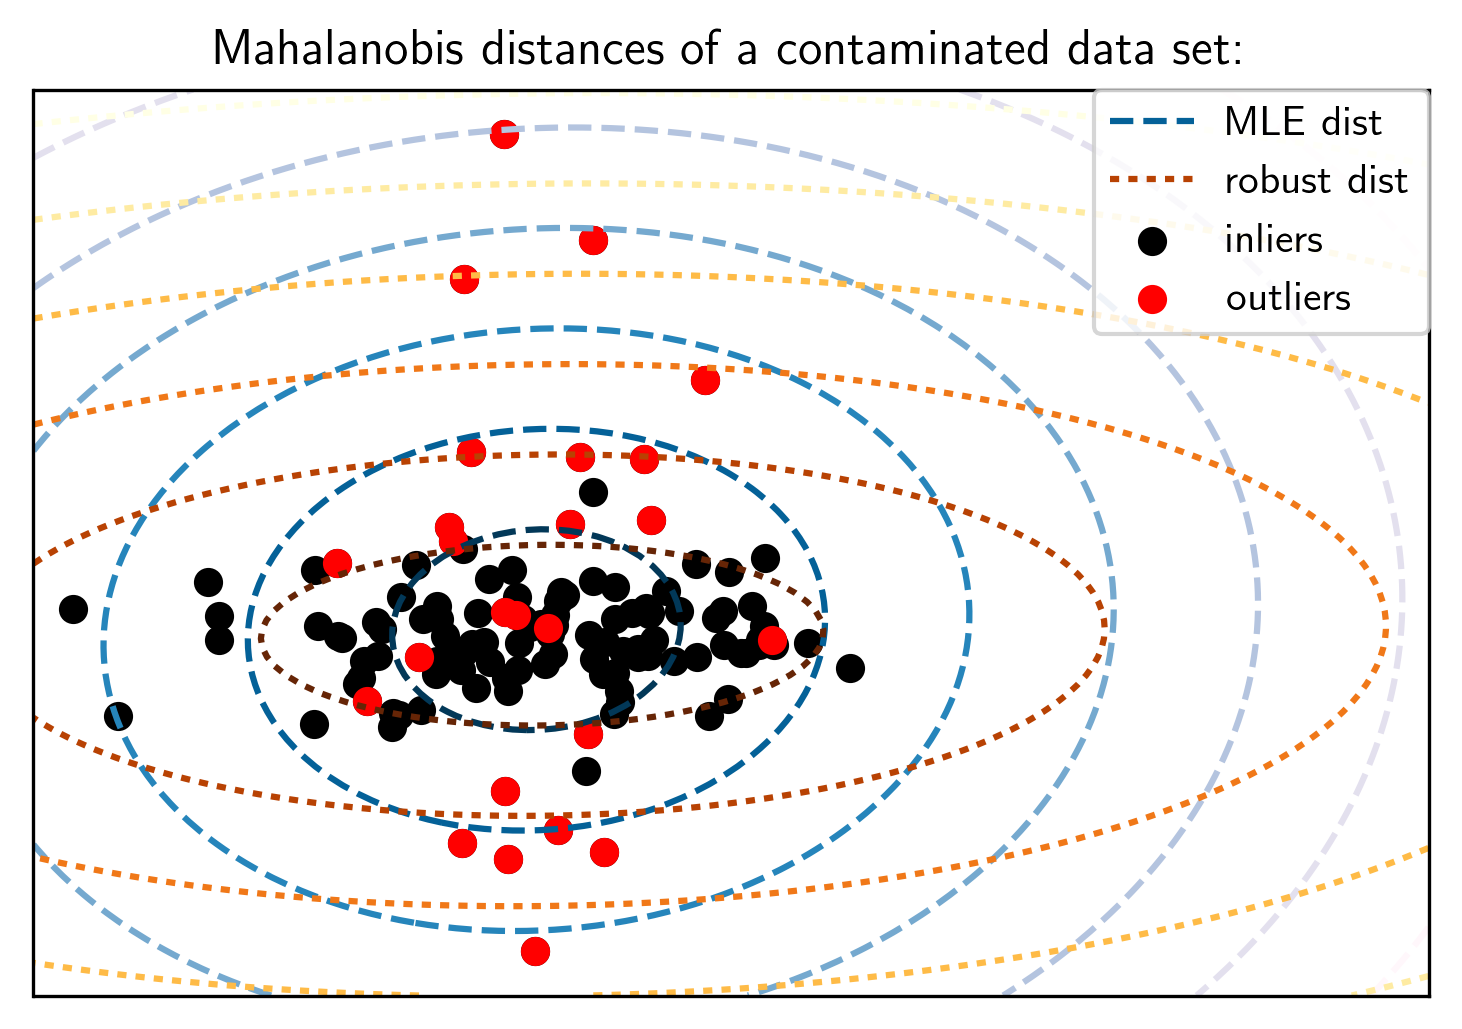

In [129]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

n_samples = 125
n_outliers = 25
n_features = 2

# generate data
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

# fit a Minimum Covariance Determinant (MCD) robust estimator to data
robust_cov = MinCovDet().fit(X)

# compare estimators learnt from the full data set with true parameters
emp_cov = EmpiricalCovariance().fit(X)

# Show data set
subfig1 = plt.gca()
inlier_plot = subfig1.scatter(X[:, 0], X[:, 1],
                              color='black', label='inliers')
outlier_plot = subfig1.scatter(X[:, 0][-n_outliers:], X[:, 1][-n_outliers:],
                               color='red', label='outliers')
subfig1.set_xlim(subfig1.get_xlim()[0], 11.)
subfig1.set_title("Mahalanobis distances of a contaminated data set:")

# Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = subfig1.contour(xx, yy, np.sqrt(mahal_emp_cov),
                                  cmap=plt.cm.PuBu_r,
                                  linestyles='dashed')

mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = subfig1.contour(xx, yy, np.sqrt(mahal_robust_cov),
                                 cmap=plt.cm.YlOrBr_r, linestyles='dotted')

subfig1.legend([emp_cov_contour.collections[1], robust_contour.collections[1],
                inlier_plot, outlier_plot],
               ['MLE dist', 'robust dist', 'inliers', 'outliers'],
               loc="upper right", borderaxespad=0)
plt.xticks(())
plt.yticks(())



In [137]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(X)
pred = ee.predict(X)
print(pred)
print(np.mean(pred == -1))

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1  1]
0.104


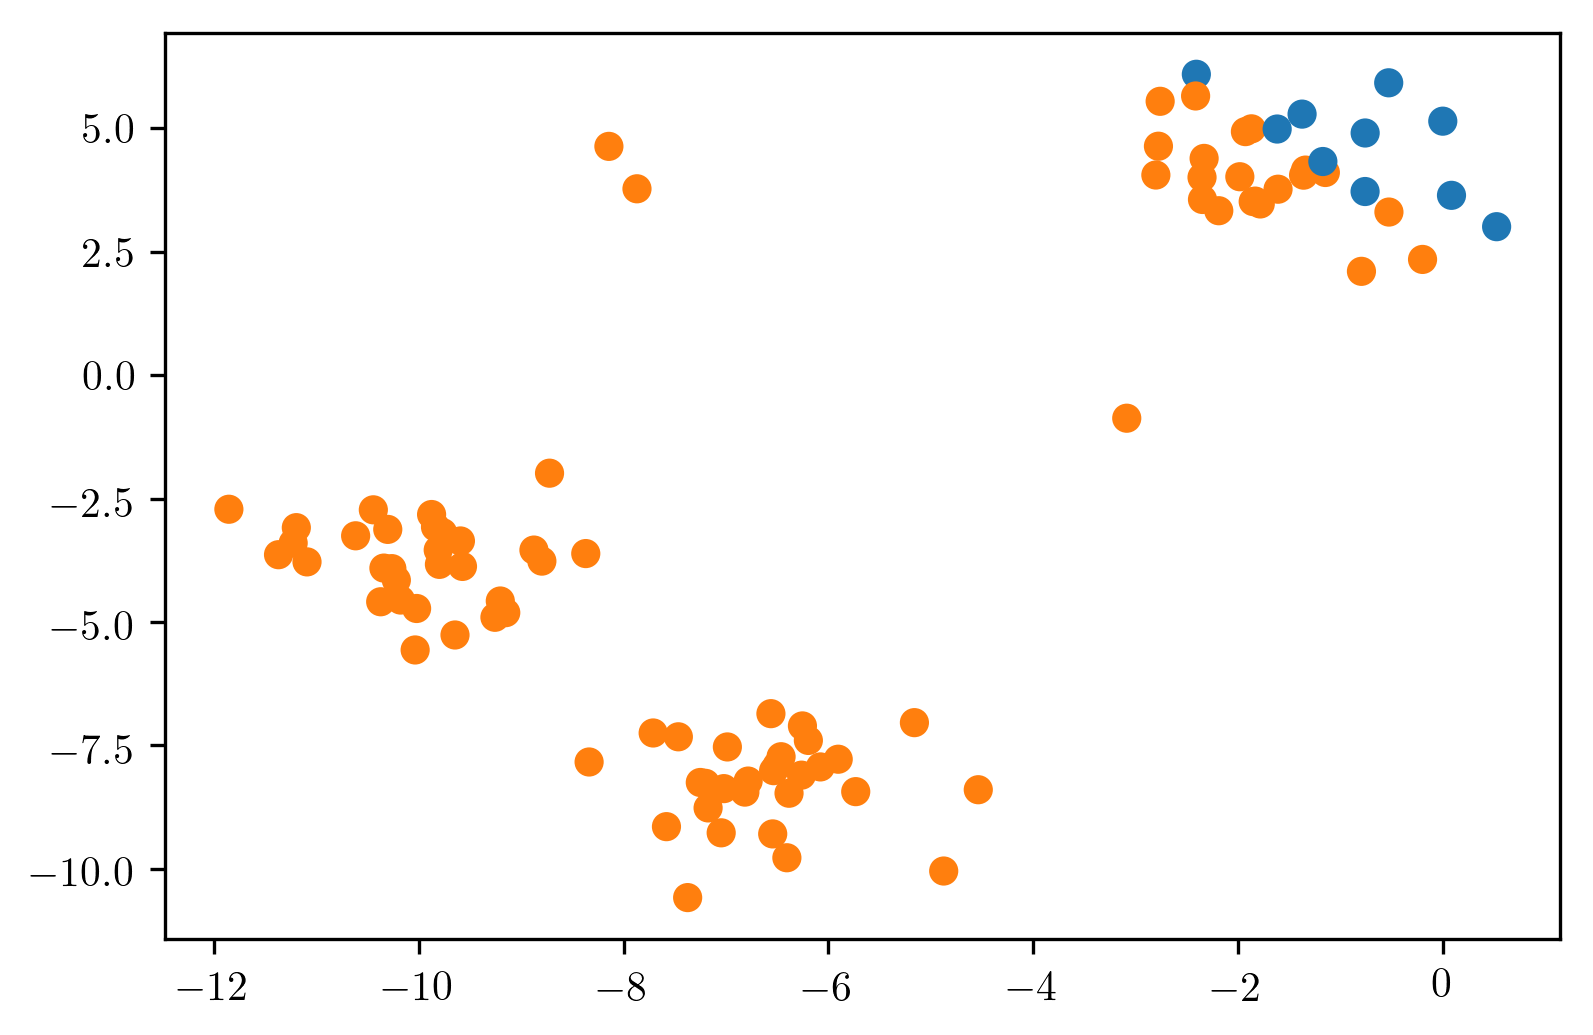

In [138]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=.1).fit(X_train_noise)
pred = ee.predict(X_train_noise)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))

(-6, -2)

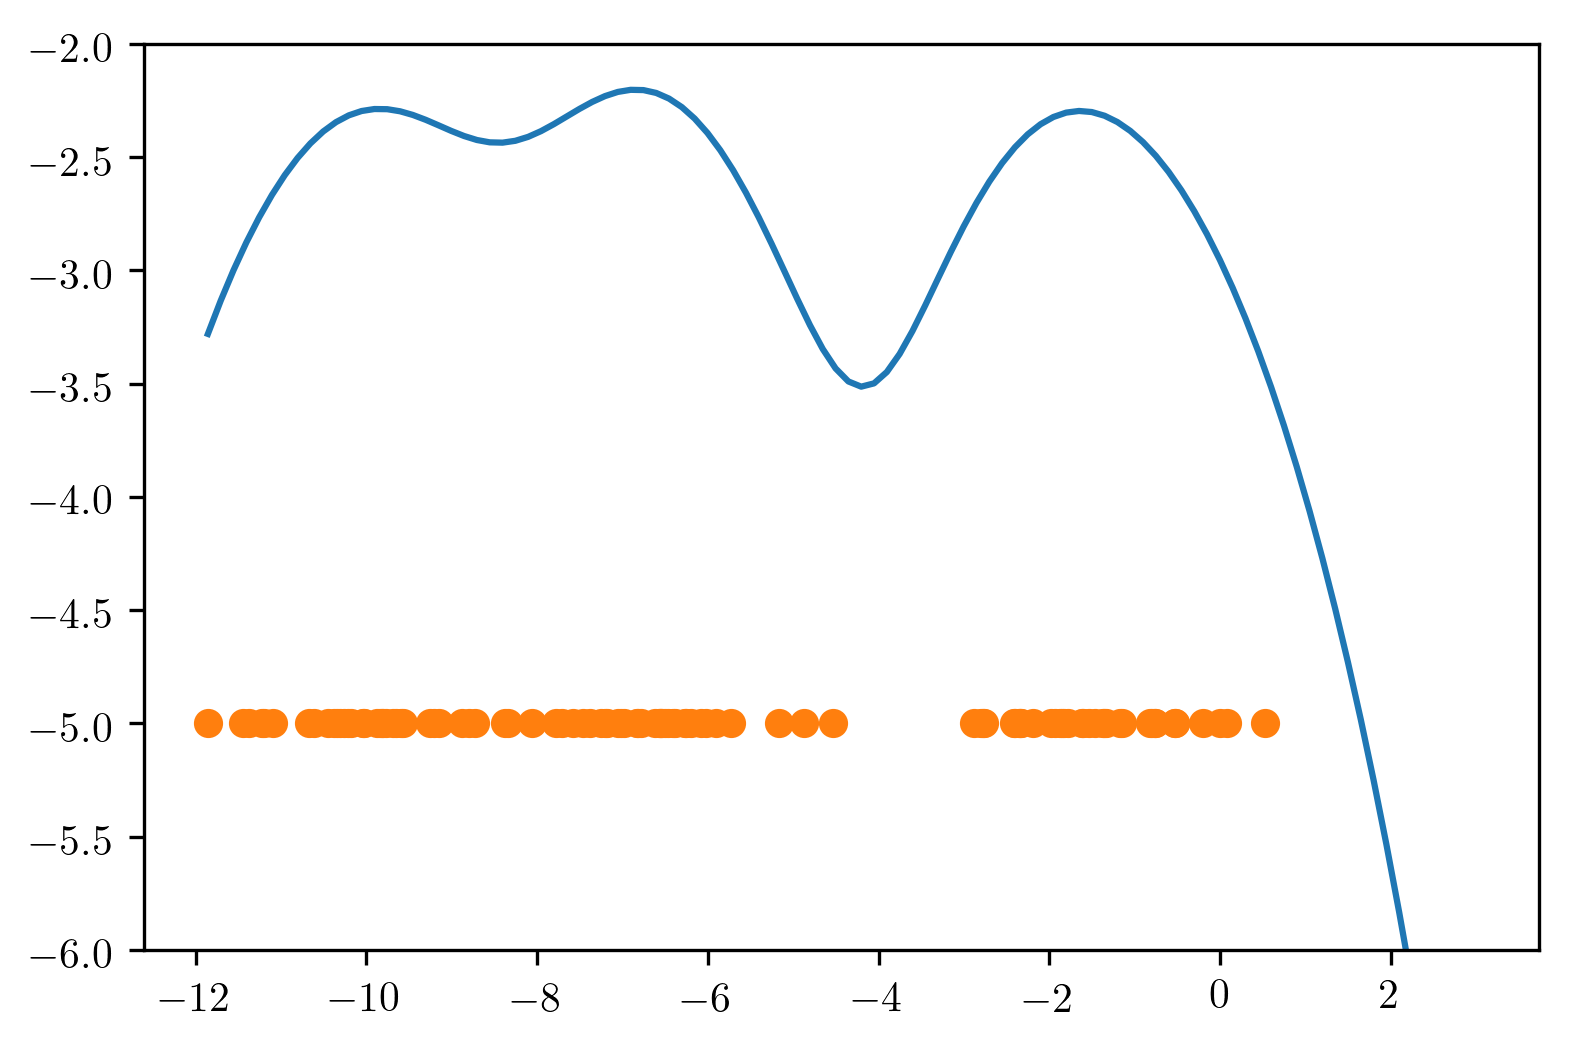

In [160]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity().fit(X_noise[:, :1])

line = np.linspace(X_noise.min(), 3, 100)
line_density = kde.score_samples(line[:, np.newaxis])

plt.plot(line, line_density)
plt.plot(X_noise[:, 0], -5 * np.ones(X_noise.shape[0]), 'o')
plt.ylim(-6, -2)

(-7, 1)

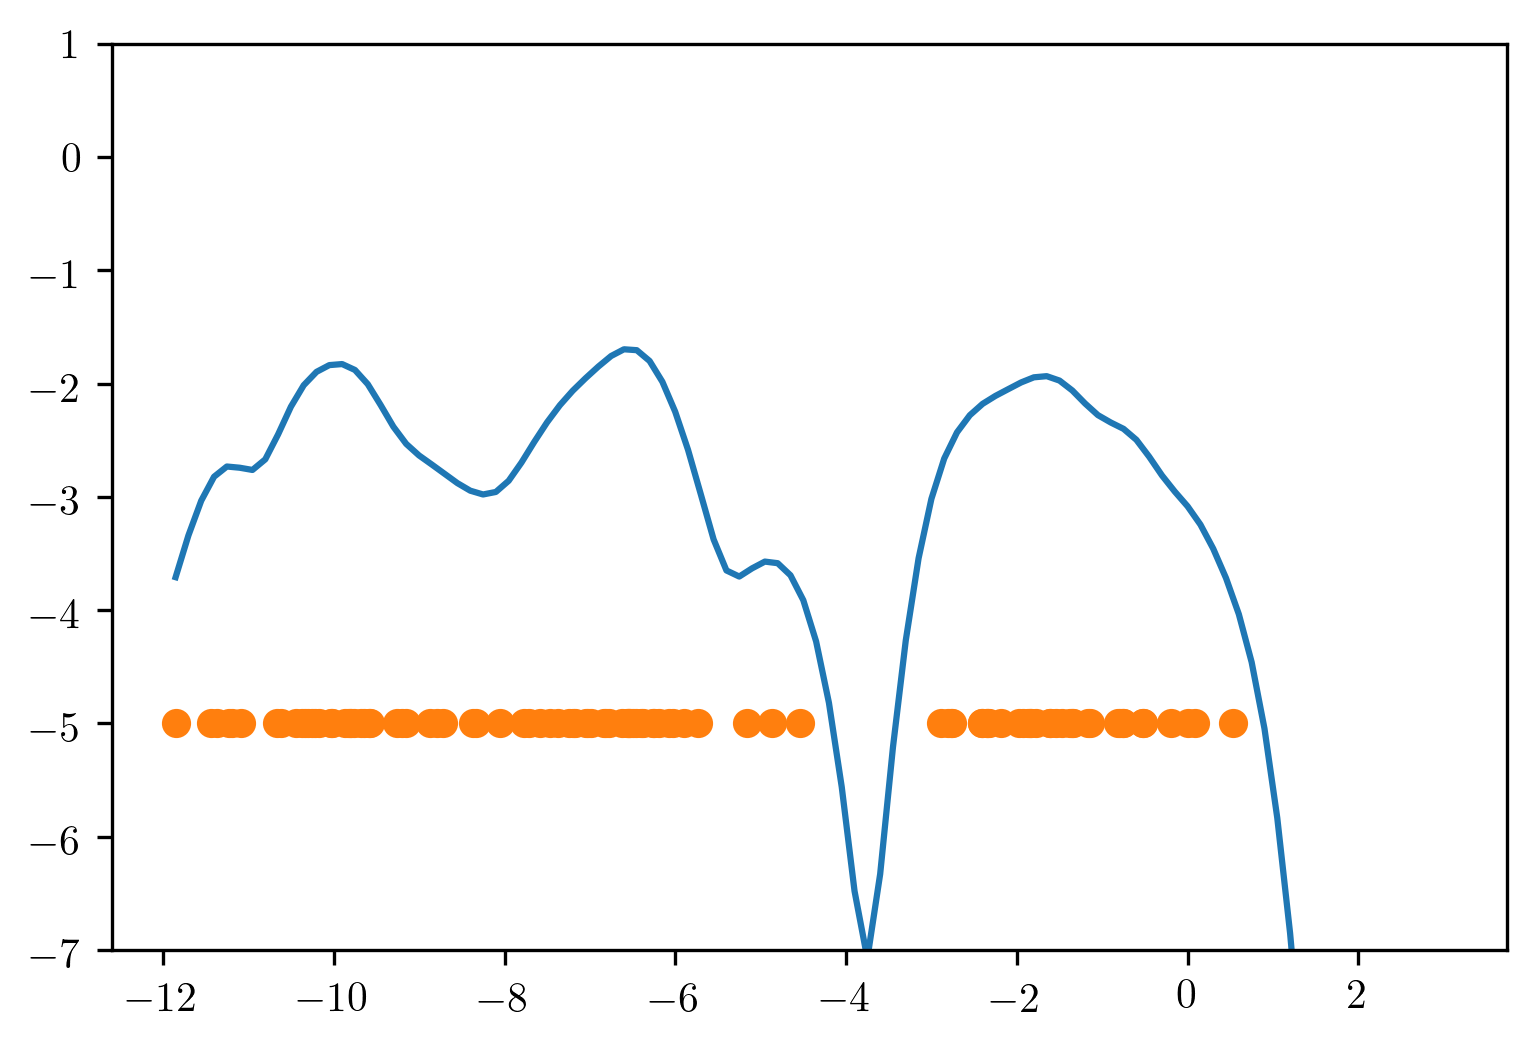

In [165]:
kde = KernelDensity(bandwidth=.3).fit(X_noise[:, :1])

line = np.linspace(X_noise.min(), 3, 100)
line_density = kde.score_samples(line[:, np.newaxis])

plt.plot(line, line_density)
plt.plot(X_noise[:, 0], -5 * np.ones(X_noise.shape[0]), 'o')
plt.ylim(-7, 1)

In [202]:
kde = KernelDensity(bandwidth=3)
kde.fit(X_train_noise)
pred = kde.score_samples(X_train_noise)
pred = (pred > np.percentile(pred, 10)).astype(int)

array([ True, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False], dtype=bool)

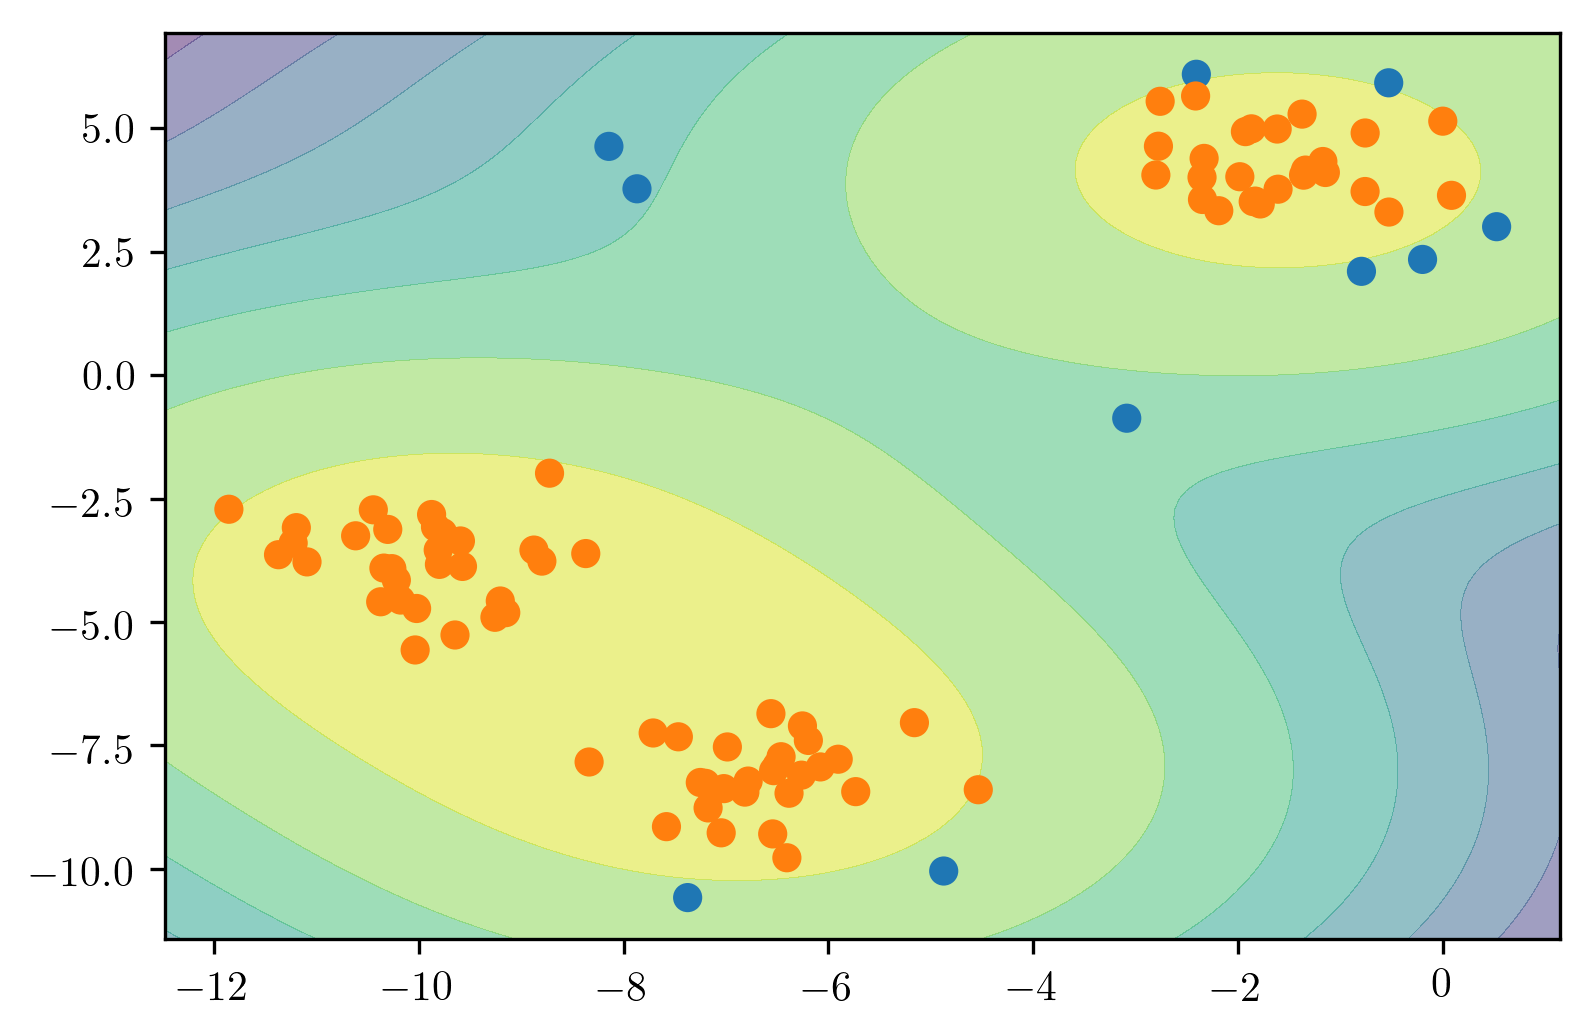

In [201]:
xs = np.linspace(xlim[0], xlim[1], 100)
ys = np.linspace(ylim[0], ylim[1], 100)
xx, yy = np.meshgrid(xs, ys)
dec = kde.score_samples(np.c_[xx.ravel(), yy.ravel()])

plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
pred = kde.score_samples(X_train_noise)
pred = (pred > np.percentile(pred, 10)).astype(int)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))

In [228]:
from sklearn.svm import OneClassSVM
scaler = StandardScaler()
X_train_noise_scaled = scaler.fit_transform(X_train_noise)
oneclass = OneClassSVM(nu=.1).fit(X_train_noise_scaled)
pred = oneclass.predict(X_train_noise_scaled).astype(np.int)

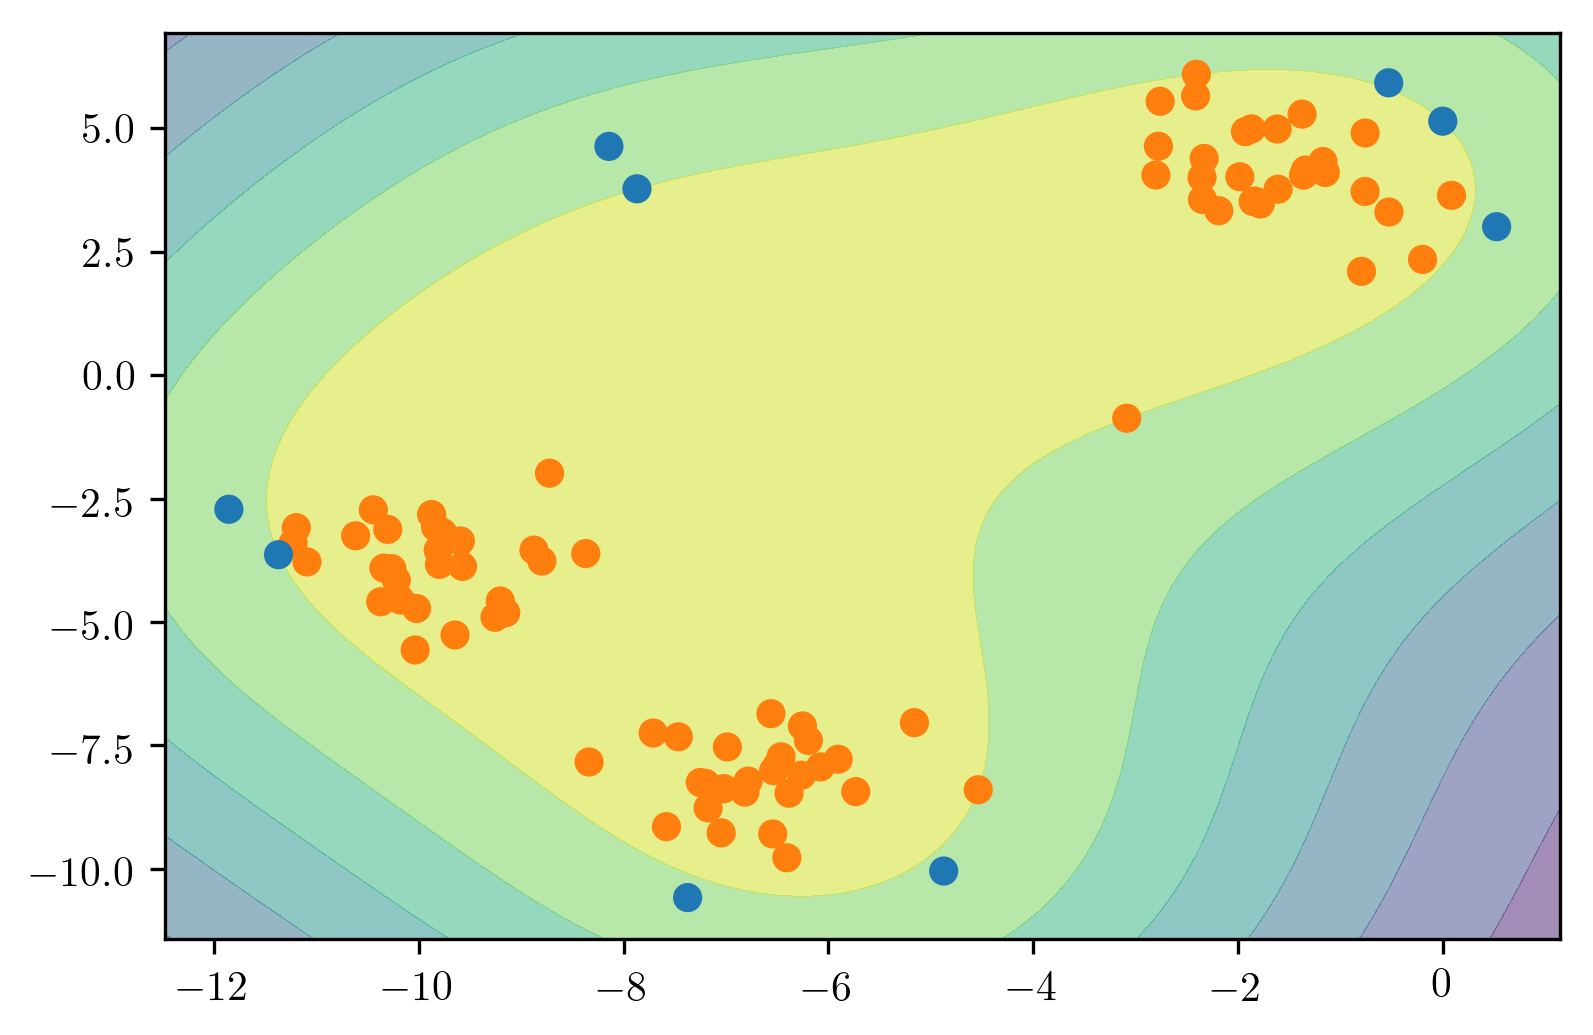

In [229]:
dec = oneclass.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))

In [169]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest().fit(X_train_noise)
pred = iso.predict(X_train_noise)

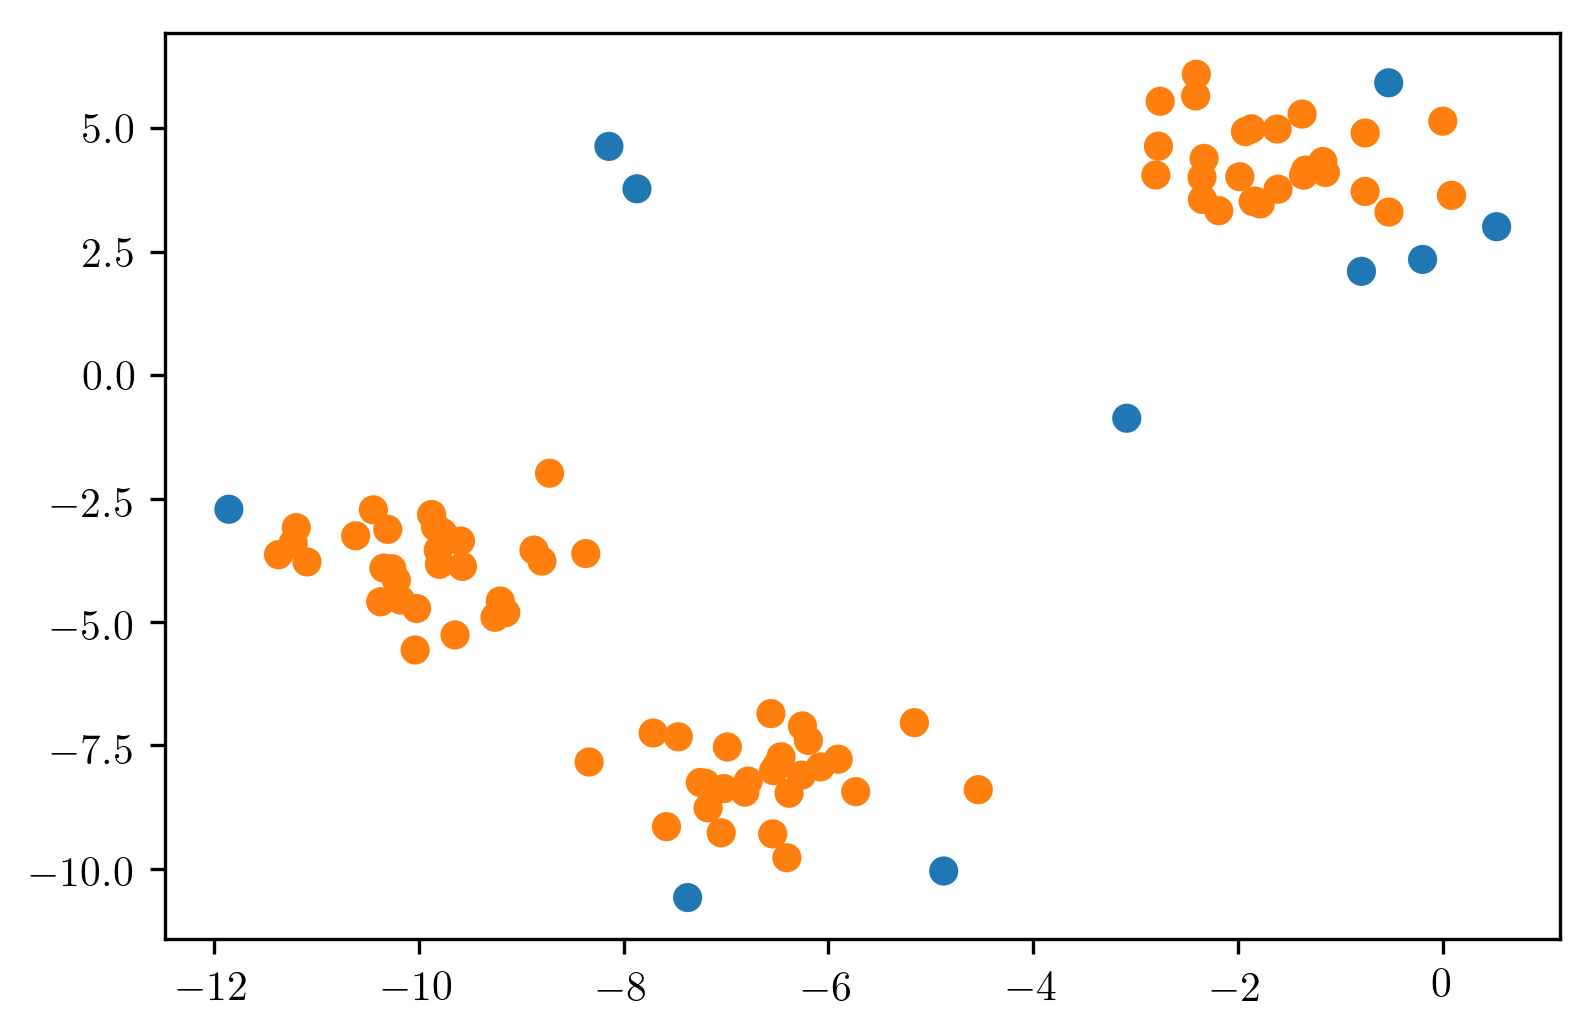

In [175]:
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))
xlim = plt.xlim()
ylim = plt.ylim()

In [178]:
xs = np.linspace(xlim[0], xlim[1], 100)
ys = np.linspace(ylim[0], ylim[1], 100)
xx, yy = np.meshgrid(xs, ys)
dec = iso.decision_function(np.c_[xx.ravel(), yy.ravel()])

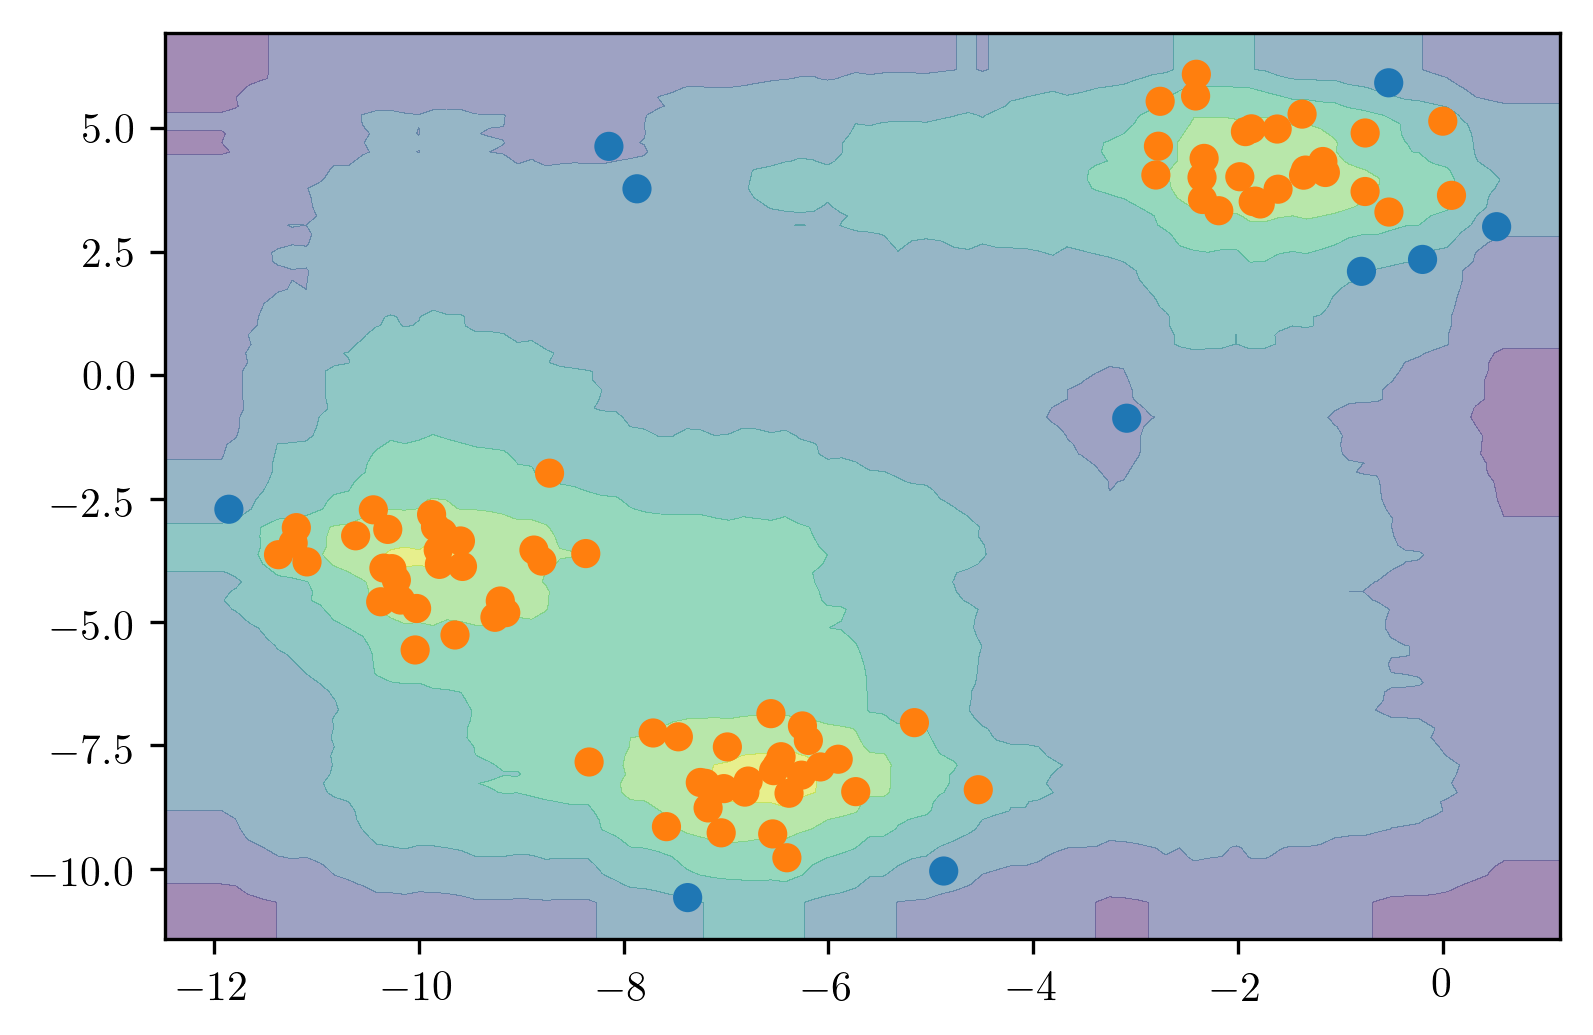

In [180]:
plt.xlim(xlim)
plt.ylim(ylim)
plt.contourf(xx, yy, dec.reshape(xx.shape), alpha=.5)
plt.scatter(X_train_noise[:, 0], X_train_noise[:, 1], c=plt.cm.Vega10(pred))


In [231]:
data = pd.read_csv("creditcard.csv")

In [232]:
data.shape

(284807, 31)

In [233]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [235]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("Class", axis=1), data.Class, train_size=.1, random_state=0)

In [237]:
X_train.shape

(28480, 30)

In [238]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [240]:
ee = EllipticEnvelope().fit(X_train_scaled)
# => error

ValueError: Singular covariance matrix. Please check that the covariance matrix corresponding to the dataset is full rank and that MinCovDet is used with Gaussian-distributed data (or at least data drawn from a unimodal, symmetric distribution.

In [243]:
from sklearn.decomposition import PCA
X_train_pca = PCA(n_components=.8).fit_transform(X_train_scaled)

In [244]:
ee = EllipticEnvelope().fit(X_train_pca)


In [246]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, ee.mahalanobis(X_train_pca))

0.91699652177871382